# F21 IEOR 142 Final Project

**Group Members: Priya Kamdar, Nirmol Kaur, Harry Li, Ananya Raghavan, and Nayan Chavan**

---

In [1]:
import pandas as pd 
import numpy as np

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


---

## Dataset Pre-processing

**Dataset source:** http://insideairbnb.com/get-the-data.html

In [4]:
listing_data = pd.read_csv('data/listings.csv')
listing_data = listing_data.rename(columns = {"neighbourhood_group": "borough"})
listing_data.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name    borough       neighbourhood  latitude  longitude  \
0     Jennifer  Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne   Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon   Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca   Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi  Manhattan             Midtown  40.76457  -73.98317   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 48  2019-11-04   
1  Entire home/apt     76               1                408  2021-06-29   
2     Private room     60              30                 50  2016-06-05   
3  Entire home/apt    275               5                  2  2021-08-08   
4     Private room     68               2                490  2021-08-14   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.33                               3               340   
1               5.03                               1               208   
2               0.54                               1               365   
3               0.02                               1               204   
4               3.64                               1               243   

   number_of_reviews_ltm  license  
0                      0      NaN  
1                     58      NaN  
2                      0      NaN  
3                      1      NaN  
4                     17      NaN

In [5]:
borough = (listing_data['borough'].unique())
neighbourhoods = (listing_data['neighbourhood'].unique())

### Population Data for Boroughs

In [6]:
borough_pop = pd.read_csv('data/nyc-borough-population.csv')
borough_pop = borough_pop.drop([0])
borough_pop = borough_pop.rename(columns = {"Borough":"borough"})
borough_pop.head(6)

Age Group           borough     1950  \
1  Total Population             Bronx  1451277   
2  Total Population          Brooklyn  2738175   
3  Total Population         Manhattan  1960101   
4  Total Population            Queens  1550849   
5  Total Population     Staten Island   191555   

   1950 - Boro share of NYC total     1960  1960 - Boro share of NYC total  \
1                           18.39  1424815                           18.31   
2                           34.70  2627319                           33.76   
3                           24.84  1698281                           21.82   
4                           19.65  1809578                           23.25   
5                            2.43   221991                            2.85   

      1970  1970 - Boro share of NYC total     1980  \
1  1471701                           18.64  1168972   
2  2602012                           32.96  2230936   
3  1539233                           19.50  1428285   
4  1986473                           25.16  1891325   
5   295443                            3.74   352121   

   1980 - Boro share of NYC total  ...     2000  \
1                           16.53  ...  1332650   
2                           31.55  ...  2465326   
3                           20.20  ...  1537195   
4                           26.75  ...  2229379   
5                            4.98  ...   443728   

   2000 - Boro share of NYC total     2010  2010 - Boro share of NYC total  \
1                           16.64  1385108                           16.80   
2                           30.78  2552911                           30.97   
3                           19.20  1585873                           19.24   
4                           27.84  2250002                           27.30   
5                            5.54   468730                            5.69   

      2020  2020 - Boro share of NYC total     2030  \
1  1446788                           16.92  1518998   
2  2648452                           30.97  2754009   
3  1638281                           19.16  1676720   
4  2330295                           27.25  2373551   
5   487155                            5.70   497749   

   2030 - Boro share of NYC total     2040  2040 - Boro share of NYC total  
1                           17.22  1579245                           17.50  
2                           31.22  2840525                           31.47  
3                           19.01  1691617                           18.74  
4                           26.91  2412649                           26.73  
5                            5.64   501109                            5.55  

[5 rows x 22 columns]

#### Appending Population Data for Boroughs

In [7]:
for i in range(len(listing_data)):
    if listing_data.loc[i, 'borough'] == 'Manhattan':
        listing_data.loc[i, '2020_population'] = '1638281'
    if listing_data.loc[i, 'borough'] == 'Bronx':
        listing_data.loc[i, '2020_population'] = '1446788'
    if listing_data.loc[i, 'borough'] == 'Brooklyn':
        listing_data.loc[i, '2020_population'] = '2648452'
    if listing_data.loc[i, 'borough'] == 'Queens':
        listing_data.loc[i, '2020_population'] = '2330295'
    elif listing_data.loc[i, 'borough'] == 'Staten Island':
        listing_data.loc[i, '2020_population'] = '487155'
listing_data.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name    borough       neighbourhood  latitude  longitude  \
0     Jennifer  Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne   Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon   Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca   Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi  Manhattan             Midtown  40.76457  -73.98317   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 48  2019-11-04   
1  Entire home/apt     76               1                408  2021-06-29   
2     Private room     60              30                 50  2016-06-05   
3  Entire home/apt    275               5                  2  2021-08-08   
4     Private room     68               2                490  2021-08-14   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.33                               3               340   
1               5.03                               1               208   
2               0.54                               1               365   
3               0.02                               1               204   
4               3.64                               1               243   

   number_of_reviews_ltm  license 2020_population  
0                      0      NaN         1638281  
1                     58      NaN         2648452  
2                      0      NaN         2648452  
3                      1      NaN         2648452  
4                     17      NaN         1638281

### Profile Data for Boroughs

In [8]:
brooklyn_profile = pd.read_csv('data/BK_NeighborhoodDataProfile.csv')
brooklyn_profile.head()

Community District      Name Indicator Category                Indicator  \
0                 BK  Brooklyn       Demographics   Born in New York State   
1                 BK  Brooklyn       Demographics      Disabled population   
2                 BK  Brooklyn       Demographics  Foreign-born population   
3                 BK  Brooklyn       Demographics               Population   
4                 BK  Brooklyn       Demographics      Population aged 65+   

                               Indicator Description       2000       2006  \
0  The percentage of city residents who were born...        NaN      50.3%   
1  The percentage of the adult population who hav...        NaN        NaN   
2  The share of the population that is born outsi...      37.8%      37.8%   
3  All people, both children and adults, living i...  2,465,326  2,508,820   
4  The percentage of residents who are aged 65 ye...      11.5%      12.0%   

        2010       2019 2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
0      49.6%      49.5%  NaN        NaN        3.0        3.0           3.0  
1       6.4%       6.0%  NaN        NaN        NaN        4.0           5.0  
2      37.8%      35.4%  NaN        2.0        2.0        2.0           2.0  
3  2,508,340  2,559,903  NaN        NaN        NaN        NaN           NaN  
4      11.5%      14.4%  NaN        4.0        3.0        4.0           4.0

#### Profile data summary

In [9]:
print((brooklyn_profile['Indicator Category'].unique()))
print((brooklyn_profile['Indicator'].unique()))

['Demographics' 'Housing Market and Conditions' 'Land Use and Development'
 'Neighborhood Services and Conditions' 'Renters' nan]
['Born in New York State' 'Disabled population' 'Foreign-born population'
 'Population' 'Population aged 65+'
 'Households with children under 18 years old' 'Single-person households'
 'Percent Asian' 'Percent Black' 'Percent Hispanic' 'Percent white'
 'Racial diversity index' 'Income diversity ratio'
 'Median household income (2020$)'
 'Median household income, homeowners (2020$)'
 'Median household income, renters (2020$)' 'Poverty rate'
 'Poverty rate, population aged 65+'
 'Poverty rate, population under 18 years old'
 'Labor force participation rate'
 "Population aged 25+ with a bachelor's degree or higher"
 'Population aged 25+ without a high school diploma' 'Unemployment rate'
 'Homeownership rate' 'Housing units' 'Rental vacancy rate'
 'Serious housing code violations (per 1,000 privately owned rental units)'
 'Severe crowding rate (% of renter house

In [10]:
bronx_profile = pd.read_csv('data/BX_NeighborhoodDataProfile.csv')
manhattan_profile = pd.read_csv('data/MN_NeighborhoodDataProfile.csv')
queens_profile = pd.read_csv('data/QN_NeighborhoodDataProfile.csv')
staten_profile = pd.read_csv('data/SI_NeighborhoodDataProfile.csv')

##### Indicators that we want to explore across all 5 borough profiles: 
* **Index of housing price appreciation, all property types:** "The average price changes in repeated sales of the same properties of any type (index=100 in 2000)."
* **Serious crime rate (per 1,000 residents):** "The number of serious crimes, those classified as a major felony as defined by the NYPD, committed in a given geographic area per 1,000 residents."
* **Median rent, all (2020$):** "The median gross rent, which includes the amount agreed to or specified in the lease regardless of whether furnishings, utilities, or services are included; and estimated monthly electricity and heating fuel costs paid by the renter."
* **Housing Units:** "The number of housings units, which can include a house, apartment, mobile home, group of rooms, or single room that is occupied (or is vacant and intended for occupancy) as separate living quarters."
* **Public housing (% of rental units):** "The share of all rental units located in New York City Housing Authority public housing."


#### Appending 5 Borough Profile Indicators to listing_data

In [11]:
indicators = ["Index of housing price appreciation, all property types", "Serious crime rate (per 1,000 residents)", "Median rent, all (2020$)", "Housing units", "Public housing (% of rental units)"]

In [12]:
brooklyn_indicators = brooklyn_profile[brooklyn_profile['Indicator'].isin(indicators)]
brooklyn_indicators

Community District      Name                    Indicator Category  \
24                 BK  Brooklyn         Housing Market and Conditions   
55                 BK  Brooklyn         Housing Market and Conditions   
62                 BK  Brooklyn  Neighborhood Services and Conditions   
68                 BK  Brooklyn                               Renters   
82                 BK  Brooklyn                               Renters   

                                            Indicator  \
24                                      Housing units   
55  Index of housing price appreciation, all prope...   
62           Serious crime rate (per 1,000 residents)   
68                           Median rent, all (2020$)   
82                 Public housing (% of rental units)   

                                Indicator Description    2000     2006  \
24  The number of housings units, which can includ...     NaN  954,382   
55  The average price changes in repeated sales of...   100.0    230.1   
62  The number of serious crimes, those classified...    22.9     15.8   
68  The median gross rent, which includes the amou...  $1,040   $1,150   
82  The share of all rental units located in New Y...     NaN      NaN   

         2010       2019   2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
24  1,000,000  1,065,363    NaN        NaN        1.0        1.0           1.0  
55      173.1      302.6  317.8        NaN        2.0        3.0           1.0  
62       13.2       10.8   10.8        3.0        3.0        3.0           3.0  
68     $1,270     $1,510    NaN        4.0        4.0        4.0           3.0  
82        NaN        NaN   8.0%        NaN        NaN        NaN           4.0

In [13]:
bronx_indicators = bronx_profile[bronx_profile['Indicator'].isin(indicators)]
bronx_indicators

Community District       Name                    Indicator Category  \
24                 BX  The Bronx         Housing Market and Conditions   
55                 BX  The Bronx         Housing Market and Conditions   
62                 BX  The Bronx  Neighborhood Services and Conditions   
68                 BX  The Bronx                               Renters   
82                 BX  The Bronx                               Renters   

                                            Indicator  \
24                                      Housing units   
55  Index of housing price appreciation, all prope...   
62           Serious crime rate (per 1,000 residents)   
68                           Median rent, all (2020$)   
82                 Public housing (% of rental units)   

                                Indicator Description   2000     2006  \
24  The number of housings units, which can includ...    NaN  506,396   
55  The average price changes in repeated sales of...  100.0    232.8   
62  The number of serious crimes, those classified...   23.8     16.6   
68  The median gross rent, which includes the amou...   $960   $1,060   
82  The share of all rental units located in New Y...    NaN      NaN   

       2010     2019   2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
24  512,024  537,197    NaN        NaN        4.0        4.0           4.0  
55    178.0    256.5  268.3        NaN        1.0        2.0           3.0  
62     14.3     14.0   14.9        2.0        2.0        2.0           2.0  
68   $1,140   $1,250    NaN        5.0        5.0        5.0           5.0  
82      NaN      NaN  13.3%        NaN        NaN        NaN           1.0

In [14]:
manhattan_indicators = manhattan_profile[manhattan_profile['Indicator'].isin(indicators)]
manhattan_indicators

Community District       Name                    Indicator Category  \
24                 MN  Manhattan         Housing Market and Conditions   
55                 MN  Manhattan         Housing Market and Conditions   
62                 MN  Manhattan  Neighborhood Services and Conditions   
68                 MN  Manhattan                               Renters   
82                 MN  Manhattan                               Renters   

                                            Indicator  \
24                                      Housing units   
55  Index of housing price appreciation, all prope...   
62           Serious crime rate (per 1,000 residents)   
68                           Median rent, all (2020$)   
82                 Public housing (% of rental units)   

                                Indicator Description    2000     2006  \
24  The number of housings units, which can includ...     NaN  840,443   
55  The average price changes in repeated sales of...   100.0    206.0   
62  The number of serious crimes, those classified...    32.2     22.3   
68  The median gross rent, which includes the amou...  $1,230   $1,390   
82  The share of all rental units located in New Y...     NaN      NaN   

       2010     2019   2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
24  846,962  892,930    NaN        NaN        2.0        2.0           2.0  
55    206.2    283.4  271.4        NaN        4.0        1.0           2.0  
62     17.1     17.0   15.6        1.0        1.0        1.0           1.0  
68   $1,530   $1,780    NaN        1.0        1.0        1.0           1.0  
82      NaN      NaN   8.7%        NaN        NaN        NaN           2.0

In [15]:
queens_indicators = queens_profile[queens_profile['Indicator'].isin(indicators)]
queens_indicators

Community District    Name                    Indicator Category  \
24                 QN  Queens         Housing Market and Conditions   
55                 QN  Queens         Housing Market and Conditions   
62                 QN  Queens  Neighborhood Services and Conditions   
68                 QN  Queens                               Renters   
82                 QN  Queens                               Renters   

                                            Indicator  \
24                                      Housing units   
55  Index of housing price appreciation, all prope...   
62           Serious crime rate (per 1,000 residents)   
68                           Median rent, all (2020$)   
82                 Public housing (% of rental units)   

                                Indicator Description    2000     2006  \
24  The number of housings units, which can includ...     NaN  832,545   
55  The average price changes in repeated sales of...   100.0    224.3   
62  The number of serious crimes, those classified...    19.1     12.4   
68  The median gross rent, which includes the amou...  $1,200   $1,370   
82  The share of all rental units located in New Y...     NaN      NaN   

       2010     2019   2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
24  834,965  869,346    NaN        NaN        3.0        3.0           3.0  
55    157.9    245.8  265.7        NaN        3.0        5.0           4.0  
62     10.3      8.4    8.9        4.0        4.0        4.0           4.0  
68   $1,460   $1,670    NaN        2.0        2.0        2.0           2.0  
82      NaN      NaN   3.8%        NaN        NaN        NaN           5.0

In [16]:
staten_indicators = staten_profile[staten_profile['Indicator'].isin(indicators)]
staten_indicators

Community District           Name                    Indicator Category  \
24                 SI  Staten Island         Housing Market and Conditions   
55                 SI  Staten Island         Housing Market and Conditions   
62                 SI  Staten Island  Neighborhood Services and Conditions   
68                 SI  Staten Island                               Renters   
82                 SI  Staten Island                               Renters   

                                            Indicator  \
24                                      Housing units   
55  Index of housing price appreciation, all prope...   
62           Serious crime rate (per 1,000 residents)   
68                           Median rent, all (2020$)   
82                 Public housing (% of rental units)   

                                Indicator Description    2000     2006  \
24  The number of housings units, which can includ...     NaN  177,353   
55  The average price changes in repeated sales of...   100.0    204.1   
62  The number of serious crimes, those classified...    10.5      7.6   
68  The median gross rent, which includes the amou...  $1,150   $1,270   
82  The share of all rental units located in New Y...     NaN      NaN   

       2010     2019   2020  2000 Rank  2006 Rank  2010 Rank  2019/20 Rank  
24  176,696  181,765    NaN        NaN        5.0        5.0           5.0  
55    167.9    219.0  236.4        NaN        5.0        4.0           5.0  
62      6.3      5.1    5.2        5.0        5.0        5.0           5.0  
68   $1,340   $1,320    NaN        3.0        3.0        3.0           4.0  
82      NaN      NaN   8.3%        NaN        NaN        NaN           3.0

##### We will use 2019 data or the latest available data for our indicators where 2020 is not available. 

In [17]:
dict1 = {'Brooklyn': 1510, 
'Manhattan': 1780, 
'Queens': 1670, 
'Bronx': 1250, 
'Staten Island': 1320}

dict2 = {'Brooklyn': 1065363, 
'Manhattan': 892930, 
'Queens': 869346, 
'Bronx': 537197, 
'Staten Island': 181765}

dict3 = {'Brooklyn': 317.8, 
'Manhattan': 271.4, 
'Queens': 265.7, 
'Bronx': 268.3, 
'Staten Island': 236.4}

dict4 = {'Brooklyn': 10.8, 
'Manhattan': 15.6, 
'Queens': 8.9, 
'Bronx': 14.9, 
'Staten Island': 5.2}

dict5 = {'Brooklyn': .8, 
'Manhattan': .087, 
'Queens': .038, 
'Bronx': .133, 
'Staten Island': .083}

listing_data['median_rent_all_2020'] = listing_data['borough'].map(dict1)
listing_data['housing_units'] = listing_data['borough'].map(dict2)
listing_data['index_of_all_housing_type_price_appreciation'] = listing_data['borough'].map(dict3)
listing_data['serious_crime_rate_per_1000_residents'] = listing_data['borough'].map(dict4)
listing_data['public_housing_percentage_of_rental_units'] = listing_data['borough'].map(dict5)

In [18]:
listing_data.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name    borough       neighbourhood  latitude  longitude  \
0     Jennifer  Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne   Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon   Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca   Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi  Manhattan             Midtown  40.76457  -73.98317   

         room_type  price  ...  calculated_host_listings_count  \
0  Entire home/apt    150  ...                               3   
1  Entire home/apt     76  ...                               1   
2     Private room     60  ...                               1   
3  Entire home/apt    275  ...                               1   
4     Private room     68  ...                               1   

   availability_365 number_of_reviews_ltm  license  2020_population  \
0               340                     0      NaN          1638281   
1               208                    58      NaN          2648452   
2               365                     0      NaN          2648452   
3               204                     1      NaN          2648452   
4               243                    17      NaN          1638281   

   median_rent_all_2020  housing_units  \
0                  1780         892930   
1                  1510        1065363   
2                  1510        1065363   
3                  1510        1065363   
4                  1780         892930   

   index_of_all_housing_type_price_appreciation  \
0                                         271.4   
1                                         317.8   
2                                         317.8   
3                                         317.8   
4                                         271.4   

  serious_crime_rate_per_1000_residents  \
0                                  15.6   
1                                  10.8   
2                                  10.8   
3                                  10.8   
4                                  15.6   

   public_housing_percentage_of_rental_units  
0                                      0.087  
1                                      0.800  
2                                      0.800  
3                                      0.800  
4                                      0.087  

[5 rows x 24 columns]

---

## Let's LOOK at the data!

In [19]:
# imports
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import json
import os

In [20]:
!pip install folium --upgrade
import folium.plugins # The Folium Javascript Map Library
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

#### Let's look at a map of New York City!

In [21]:
example_map1 = folium.Map([40.693943, -73.985880], zoom_start=12)
example_map1

In [22]:
data = (np.random.normal(size=(100, 2)) *
        np.array([[1, 1]]) +
        np.array([[39.83, -98.59]])).tolist()

# Print first 10 sample points
data[:10]

[[39.42373341754966, -97.14856147118229],
 [41.78089648928904, -97.19958570645552],
 [39.39154600925471, -98.7805868605201],
 [39.04971411679872, -97.63835835428854],
 [40.40194899896558, -100.3498731604813],
 [38.87708274288387, -97.57894296966123],
 [41.81848946932817, -97.9165860391916],
 [40.221493225594465, -98.75335836117526],
 [41.122576671455306, -98.73585107469883],
 [40.93325520715489, -96.49402561483826]]

* The first two lines generate an array of small random numbers.
* The third line adds the random numbers to the pair [48, 5] to get 100 latitude, longitude pairs near [48, 5]

In [23]:
Staten_Island_coords = (40.5795, -74.1502) 
Staten_Island_map = folium.Map(location=Staten_Island_coords, zoom_start=13) 
Staten_Island_map

In [24]:
Queens_coords = (40.6815, -73.8365) 
Queens_map = folium.Map(location=Queens_coords, zoom_start=13) 
Queens_map

In [25]:
Manhattan_coords = (40.783, -73.971) 
Manhattan_map = folium.Map(location=Manhattan_coords, zoom_start=13) 
Manhattan_map

In [26]:
Bronx_coords = (40.8499, -73.8664) 
Bronx_map = folium.Map(location=Bronx_coords, zoom_start=13) 
Bronx_map

In [27]:
Brooklyn_coords = (40.6500, -73.949997) 
Brooklyn_map = folium.Map(location=Brooklyn_coords, zoom_start=13) 
Brooklyn_map

In [28]:
lat = listing_data['latitude'].values 
lon = listing_data['longitude'].values 
lat

array([40.75356   , 40.68494   , 40.68535   , ..., 40.61315   ,
       40.72435138, 40.75761749])

In [29]:
call_locs = np.vstack((lat, lon)).transpose().tolist() 
call_locs[:5]

[[40.75356, -73.98559],
 [40.68494, -73.95765],
 [40.68535, -73.95512],
 [40.66265, -73.99454],
 [40.76457, -73.98317]]

In [30]:
# Create a Heatmap with the call data.
heatmap = HeatMap(call_locs, radius = 10) 

# Add it to New York map.
Brooklyn_map.add_child(heatmap)

#### Based on this heat map, we can see the location of Airbnb rental units based on their latitude and longitude and thus see how concentrated they are in certain areas.  

In [31]:
import seaborn as sns

In [32]:
import plotly.express as px
from plotly.express.colors import diverging

lat = np.mean(listing_data['latitude'])
lon = np.mean(listing_data['longitude'])


fig = px.density_mapbox(listing_data, lat='latitude', lon='longitude', z='price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10,
                        mapbox_style="carto-positron", color_continuous_scale= [
                [0.0, "purple"],
                [0.00005, "purple"],
                [0.0005, "purple"],
                [0.005, "purple"],
                [0.007, "purple"],
                [0.009, "purple"],
                [0.01, "blue"],
                [0.02, "blue"],
                [0.025, "blue"],
                [0.03, "yellow"],
                [0.035, "yellow"],
                [0.04, "yellow"],
                [0.05, "yellow"],
                [0.07, "orange"],
                [0.09, "orange"],
                [0.1, "red"],
                [0.2, "red"],
                [0.5, "red"],
                [0.7, "black"],
                [0.9, "black"],
                [1, "black"]], opacity = 0.65)
fig.show()

#### Here, visually, we see that many of the Airbnb prices fall 0 dollars and 2,000 dollars. However, if we look closer we can see that many of the prices across all 5 boroughs fall between 0 dollars and 200 dollars. Furthermore, the more expensive prices of over 100 dollars are concentrated in Manhattan. In the rest of the notebook we will explore why.

---

## Ordinary Least Squares Regression

### Training the model

In [33]:
## Additional data preprocessing

listing_data["housing_units"] = pd.to_numeric(listing_data["housing_units"])
listing_data["index_of_all_housing_type_price_appreciation"] = pd.to_numeric(listing_data["index_of_all_housing_type_price_appreciation"])
listing_data["serious_crime_rate_per_1000_residents"] = pd.to_numeric(listing_data["serious_crime_rate_per_1000_residents"])
listing_data["median_rent_all_2020"] = pd.to_numeric(listing_data["median_rent_all_2020"])
listing_data["public_housing_percentage_of_rental_units"] = pd.to_numeric(listing_data["public_housing_percentage_of_rental_units"])

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

features = ['housing_units','index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','median_rent_all_2020','public_housing_percentage_of_rental_units']

train, test = train_test_split(listing_data, test_size=0.2, random_state=25)

X = listing_data[features]
Y = listing_data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=0)

In [35]:
X_train = sm.add_constant(X_train)
ols = sm.OLS(Y_train, X_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          7.16e-121
Time:                        17:53:48   Log-Likelihood:            -2.1026e+05
No. Observations:               29538   AIC:                         4.205e+05
Df Residuals:                   29533   BIC:                         4.206e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [36]:
# Adapted from IEOR 142 Lab 02

# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [37]:
VIF(train, features)

/Users/nayan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/nayan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



housing_units                                   inf
index_of_all_housing_type_price_appreciation    inf
serious_crime_rate_per_1000_residents           inf
median_rent_all_2020                            inf
public_housing_percentage_of_rental_units       inf
dtype: float64

One of the independent variables we have chosen is perfectly co-linear with another variable, therefore we are seeing 'inf' values for the VIFs. To see if there is any difference after removing one of the variables, we randomly chose 'public_housing_percentage_of_rental_units' to remove. 

**How VIF Changes after Removing 'public_housing_percentage_of_rental_units':**

In [38]:
features_1 = ['housing_units','index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','median_rent_all_2020']
print(VIF(train, features_1))

housing_units                                   27.714230
index_of_all_housing_type_price_appreciation    46.665085
serious_crime_rate_per_1000_residents            2.992914
median_rent_all_2020                            21.007864
dtype: float64


We see a significant change in VIF values upon removing 'public_housing_percentage_of_rental_units'. Let's see if we see any difference after removing other variables! 

**How VIF Changes after Removing 'median_rent_all_2020':**

In [39]:
features_2 = ['housing_units','index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','public_housing_percentage_of_rental_units']

print("VIF values after removing only 'median_rent_all_2020':")
print(VIF(train, features_2))


VIF values after removing only 'median_rent_all_2020':
housing_units                                    13.389986
index_of_all_housing_type_price_appreciation    402.728057
serious_crime_rate_per_1000_residents             2.617997
public_housing_percentage_of_rental_units       325.445419
dtype: float64


Again, we see a significant change in VIF, but this time with removing 'median_rent_all_2020'. 

**How VIF Changes after Removing 'serious_crime_rate_per_1000_residents':**

In [40]:
features_3 = ['housing_units','index_of_all_housing_type_price_appreciation','median_rent_all_2020','public_housing_percentage_of_rental_units']

print("VIF values after removing only 'serious_crime_rate_per_1000_residents':")
print(VIF(train, features_3))


VIF values after removing only 'serious_crime_rate_per_1000_residents':
housing_units                                    21.396125
index_of_all_housing_type_price_appreciation    239.310780
median_rent_all_2020                              9.306447
public_housing_percentage_of_rental_units       164.818189
dtype: float64


**How VIF Changes after Removing 'index_of_all_housing_type_price_appreciation':**

In [41]:
features_4 = ['housing_units','serious_crime_rate_per_1000_residents','median_rent_all_2020','public_housing_percentage_of_rental_units']

print("VIF values after removing only 'index_of_all_housing_type_price_appreciation':")
print(VIF(train, features_4))


VIF values after removing only 'index_of_all_housing_type_price_appreciation':
housing_units                                10.480290
serious_crime_rate_per_1000_residents         2.010874
median_rent_all_2020                         12.029542
public_housing_percentage_of_rental_units    21.593623
dtype: float64


We see here, upon removing 'index_of_all_housing_type_price_appreciation', the VIFs scores are now the lowest overall!

**How VIF Changes after Removing 'housing_units':**

In [42]:
features_5 = ['index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','median_rent_all_2020','public_housing_percentage_of_rental_units']

print("VIF values after removing only 'housing_units':")
print(VIF(train, features_5))


VIF values after removing only 'housing_units':
index_of_all_housing_type_price_appreciation    111.471781
serious_crime_rate_per_1000_residents             1.912270
median_rent_all_2020                              4.254112
public_housing_percentage_of_rental_units       136.404252
dtype: float64


After removing each of the 5 features and seeing how their affect the VIF values, we chose to remove 'index_of_all_housing_type_price_appreciation' to move forward with our OLS model. The removal of this particular feature returned the overall lowest VIF values across the remaining 4 features! 

#### Perhaps a better model after removing 'index_of_all_housing_type_price_appreciation': 

In [43]:
ols_1 = smf.ols(formula='price ~ housing_units + serious_crime_rate_per_1000_residents + median_rent_all_2020 + public_housing_percentage_of_rental_units' , data=train).fit()

print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          9.71e-124
Time:                        17:53:48   Log-Likelihood:            -2.0964e+05
No. Observations:               29538   AIC:                         4.193e+05
Df Residuals:                   29533   BIC:                         4.193e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [44]:
print("VIF values after removing only 'index_of_all_housing_type_price_appreciation':")
print(VIF(train, features_4))


VIF values after removing only 'index_of_all_housing_type_price_appreciation':
housing_units                                10.480290
serious_crime_rate_per_1000_residents         2.010874
median_rent_all_2020                         12.029542
public_housing_percentage_of_rental_units    21.593623
dtype: float64


Next, lets remove the feature with the next highest VIF value. Here, is it 'public_housing_percentage_of_rental_units'.

#### Perhaps an even better model upon removing 'public_housing_percentage_of_rental_units': 

In [45]:
ols_2 = smf.ols(formula='price ~ housing_units + serious_crime_rate_per_1000_residents + median_rent_all_2020', data=train).fit()

print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.39e-114
Time:                        17:53:48   Log-Likelihood:            -2.0967e+05
No. Observations:               29538   AIC:                         4.193e+05
Df Residuals:                   29534   BIC:                         4.194e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [46]:
features_6 = ['housing_units' , 'serious_crime_rate_per_1000_residents' ,  'median_rent_all_2020']

print("VIF values after removing 'index_of_all_housing_type_price_appreciation' & 'public_housing_percentage_of_rental_units':")

print(VIF(train, features_6))

VIF values after removing 'index_of_all_housing_type_price_appreciation' & 'public_housing_percentage_of_rental_units':
housing_units                            1.076205
serious_crime_rate_per_1000_residents    1.788994
median_rent_all_2020                     1.712465
dtype: float64


Great! These VIF values are all <5. Therefore, we are good to proceed with our model.

**The remaining features we will work with are 'housing_units', 'serious_crime_rate_per_1000_residents', and 'median_rent_all_2020'!**

In [47]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [48]:
print("OSR^2 Value:", OSR2(ols_2, train, test, 'price'))

OSR^2 Value: 0.01477838805792675


### Let's try to create better model with additional variables

We can look at the `latitude`, `longitude`, `availability_365`, `minimum_nights`, and `number_of_reviews`, which we have listed below.

In [49]:
independent_variables = ['latitude', 'longitude', 'availability_365', 'minimum_nights', 'number_of_reviews']


In [50]:
train2, test2 = train_test_split(listing_data, test_size=0.2, random_state=25)

X2 = listing_data[independent_variables]
Y2 = listing_data['price']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = .2, random_state=0)

In [51]:
X_train2 = sm.add_constant(X_train2)
ols2 = sm.OLS(Y_train2, X_train2).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     167.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          7.81e-176
Time:                        17:53:48   Log-Likelihood:            -2.1013e+05
No. Observations:               29538   AIC:                         4.203e+05
Df Residuals:                   29532   BIC:                         4.203e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.924e+04   2964.33

#### The accuracy of this model is slightly better, so let's add in our previous features to see if it improves.

In [52]:
train3, test3 = train_test_split(listing_data, test_size=0.2, random_state=25)

X3 = listing_data[independent_variables + features]
Y3 = listing_data['price']
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = .2, random_state=0)

In [53]:
X_train3 = sm.add_constant(X_train3)
ols3 = sm.OLS(Y_train3, X_train3).fit()
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          4.72e-244
Time:                        17:53:48   Log-Likelihood:            -2.0996e+05
No. Observations:               29538   AIC:                         4.199e+05
Df Residuals:                   29528   BIC:                         4.200e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### We are seeing that the accuracy has improved more! Let's examine the VIF scores.

In [54]:
VIF(train3, independent_variables + features)

/Users/nayan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/nayan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



latitude                                        2.709362
longitude                                       2.677660
availability_365                                1.044961
minimum_nights                                  1.033028
number_of_reviews                               1.038921
housing_units                                        inf
index_of_all_housing_type_price_appreciation         inf
serious_crime_rate_per_1000_residents                inf
median_rent_all_2020                                 inf
public_housing_percentage_of_rental_units            inf
dtype: float64

We are running into the same issue as earlier with `inf` values. Therefore, let's try taking some of them out to see if we get better VIF scores.

In [55]:
VIF(train3, independent_variables + features_6)

latitude                                 2.530792
longitude                                1.638990
availability_365                         1.044904
minimum_nights                           1.032454
number_of_reviews                        1.038668
housing_units                            1.376238
serious_crime_rate_per_1000_residents    3.281745
median_rent_all_2020                     1.737601
dtype: float64

#### Great! We are now getting relatively lower VIF scores. 
The features we can move forward with are the following: `latitude`, `longitude`, `availability_365`, `minimum_nights`, `number_of_reviews`, `housing_units`, `serious_crime_rate_per_1000_residents`, and `median_rent_all_2020`.

In [56]:
train4, test4 = train_test_split(listing_data, test_size=0.2, random_state=25)

X4 = listing_data[independent_variables + features_6]
Y4 = listing_data['price']
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size = .2, random_state=0)

In [57]:
X_train4 = sm.add_constant(X_train4)
ols4 = sm.OLS(Y_train4, X_train4).fit()
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.15e-240
Time:                        17:53:49   Log-Likelihood:            -2.0997e+05
No. Observations:               29538   AIC:                         4.200e+05
Df Residuals:                   29529   BIC:                         4.200e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [58]:
ols_4 = smf.ols(formula='price ~ latitude + longitude + availability_365 + minimum_nights + number_of_reviews + housing_units + serious_crime_rate_per_1000_residents + median_rent_all_2020', data=train).fit()
print("OSR^2 Value:", OSR2(ols_4, train4, test4, 'price'))

OSR^2 Value: 0.03426691863603226


### We see the OSR^2 value increase, meaning that these features more accurately predict the Airbnb price.

### Let's use `scikit-learn` to see how our model performs.

In [59]:
from sklearn import linear_model
X_sk = listing_data[independent_variables + features_6].values.reshape(-1, len(independent_variables + features_6))
y_sk = listing_data['price'].values

ols_sk = linear_model.LinearRegression()
model_sk = ols_sk.fit(X_sk, y_sk)

In [60]:
model_sk.score(X_sk, y_sk)

0.03660353456355103

## Our OLS model has an accuracy of approximately 3.67%

## Let's add categorical geographical data to see if we can produce a better model.
#### We added in `borough` and `neighborhood` to the list of features we previously used to improve our model accuracy. 

Now we are looking at `borough` and `neighborhood` in addition to the following features: `availability_365`, `minimum_nights`, `number_of_reviews`, `housing_units`, `serious_crime_rate_per_1000_residents`, and `median_rent_all_2020`.

We decided to drop `longitude` and `latitude` due to the incredibly high VIF scores they both had, which we discovered later one. 

In [61]:
categorical_geographical_vars = ['borough', 'neighbourhood']
dependent = ['price']

geographical_df = listing_data[ dependent + categorical_geographical_vars + independent_variables + features_6]

Before we fit our model, we will use one-hot encoding to convert our categorical variables (`borough` and `neighborhood`) into binary. We do this using `get_dummies`.

In [62]:
for variable in categorical_geographical_vars:
    dummies = pd.get_dummies(geographical_df[variable],prefix=variable)
    geographical_df = pd.concat([geographical_df,dummies],axis=1)
    geographical_df.drop([variable],axis=1,inplace=True)
    
geographical_df.head()

price  latitude  longitude  availability_365  minimum_nights  \
0    150  40.75356  -73.98559               340              30   
1     76  40.68494  -73.95765               208               1   
2     60  40.68535  -73.95512               365              30   
3    275  40.66265  -73.99454               204               5   
4     68  40.76457  -73.98317               243               2   

   number_of_reviews  housing_units  serious_crime_rate_per_1000_residents  \
0                 48         892930                                   15.6   
1                408        1065363                                   10.8   
2                 50        1065363                                   10.8   
3                  2        1065363                                   10.8   
4                490         892930                                   15.6   

   median_rent_all_2020  borough_Bronx  ...  neighbourhood_Westchester Square  \
0                  1780              0  ...                                 0   
1                  1510              0  ...                                 0   
2                  1510              0  ...                                 0   
3                  1510              0  ...                                 0   
4                  1780              0  ...                                 0   

   neighbourhood_Westerleigh  neighbourhood_Whitestone  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   neighbourhood_Williamsbridge  neighbourhood_Williamsburg  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   neighbourhood_Willowbrook  neighbourhood_Windsor Terrace  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodside  
0                        0                       0                       0  
1                        0                       0                       0  
2                        0                       0                       0  
3                        0                       0                       0  
4                        0                       0                       0  

[5 rows x 237 columns]

Here, we split our data into a training and testing set using a 70/30 split.

In [63]:
train_geo, test_geo = train_test_split(geographical_df, test_size=0.3, random_state=25)

x_geo = geographical_df.drop(['price', 'longitude', 'latitude'], axis=1)
y_geo = geographical_df['price'].astype(float)

# split train and test dataset
X_train_geo, X_test_geo, Y_train_geo, Y_test_geo = train_test_split(x_geo, y_geo , test_size=0.3, random_state=42)

In [64]:
ols_geo = sm.OLS(Y_train_geo, sm.tools.add_constant(X_train_geo).astype(float))
results_geo = ols_geo.fit()
print(results_geo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.906
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          8.18e-224
Time:                        17:53:49   Log-Likelihood:            -1.8265e+05
No. Observations:               25846   AIC:                         3.657e+05
Df Residuals:                   25626   BIC:                         3.675e+05
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### Variables with a high, positive coefficient value mean that the variable has a strong correlation positive with price. For example, we see that if a listing is in the Todt Hill neighborhood of Staten Island or the Riverdale neighborhood of the Bronx, this may drastically increase the price of the Airbnb listing as these are two of the richest neighborhoods in New York City. 

#### On the other hand, variables with extremely negative coefficient values mean that the variable has a strong negative correlation with price. For example, of the 5 boroughs, Queens has the most negative coeffcient. This likely indicates that if a listing is in Queens, then it will have a lower listing price. 

In [65]:
geo_params = []
for i in x_geo.columns:
    geo_params.append(i)

In [66]:
from sklearn import linear_model as lm
ols_geo_lm = lm.LinearRegression(fit_intercept=True)
ols_geo_lm = ols_geo_lm.fit(X_train_geo, Y_train_geo)

#### Due to the fact that we have over 200+ variables, it is difficult for us to do further feature engineering by looking at all the VIF and p-values.

### Cross Validation RSME of the OLS Model

In [67]:
from sklearn.model_selection import KFold 
from sklearn.base import clone 

def rmse(y, y_hat):
    return np.sqrt(np.mean((y - y_hat)**2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [68]:
cross_validate_rmse(ols_geo_lm, X_train_geo, Y_train_geo)

print("Cross-Validation Root Mean Squared Error for OLS:",cross_validate_rmse(ols_geo_lm, X_train_geo, Y_train_geo))

Cross-Validation Root Mean Squared Error for OLS: 790612.9621457029


In [69]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)           
    return (1 - SSE/SST)

In [70]:
OSR2(ols_geo_lm, X_train_geo, Y_train_geo, Y_test_geo)

0.06329790714383499

_from https://www.vernier.com/til/1014:_ 

**The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value.**

In [71]:
from sklearn.metrics import mean_squared_error

print("MSE of Training Set:", np.mean(np.square(Y_train_geo - ols_geo_lm.predict(X_train_geo))))
print("MSE of Testing Set:", np.mean(np.square(Y_test_geo - ols_geo_lm.predict(X_test_geo))))

MSE of Training Set: 80474.3818972065
MSE of Testing Set: 2534027141365.7275


Here we see that the MSE of the training set is significantly lower than the MSE for the testing set. This makes sense because the model was trained on the testing set.

In [105]:
ols_geo_lm.score(X_test_geo, Y_test_geo)

-25918816.297805462

In [108]:
ols_geo_lm.score(X_train_geo, Y_train_geo)

0.06329149256291278

## Our final OLS model, focusing on categorical geographical data, gives us the highest R-squared value of approximately 0.063.

The low accuracy and R-squared values are most likely due to the fact that **OLS does not perform well with multi-collinearity.** Therefore, we might have better performance with models that can better handle this, such as LASSO or Ridge Regressions. 

---

## Visualizations for our Final OLS Model

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

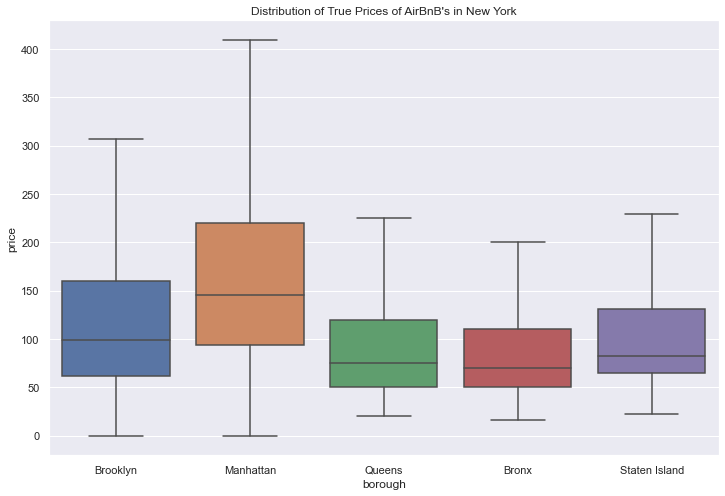

In [73]:
warnings. filterwarnings('ignore')

y_pred_OLS = ols_4.predict(X_test4)
X_test4['predictions'] = y_pred_OLS

merged = pd.concat([Y_test, X_test4], axis = 1)

d= {1510:'Brooklyn', 
1780: 'Manhattan', 
1670:'Queens', 
1250:'Bronx', 
1320:'Staten Island'}

merged['borough'] = merged['median_rent_all_2020'].map(d)

sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'price', x = 'borough', showfliers = False).set(title = "Distribution of True Prices of AirBnB's in New York"); 

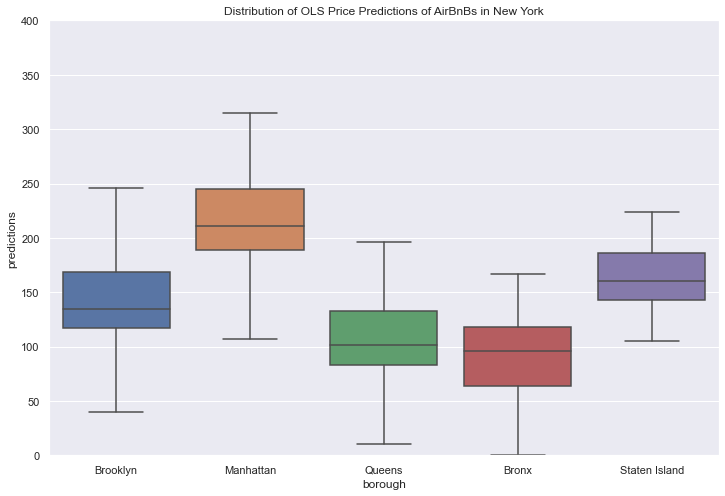

In [74]:
sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'predictions', x = 'borough', showfliers = False).set(title = "Distribution of OLS Price Predictions of AirBnBs in New York"); 
plt.ylim(0,400);

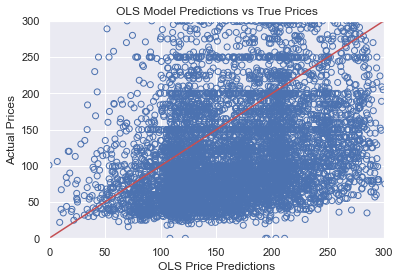

In [75]:
#plot predicted price vs actual price (x and y axis) with x = y line in middle

axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,300])

plot1 = plt.scatter(y_pred_OLS, Y_test , facecolors='none', edgecolors = 'b')
plt.plot([0,300], [0,300], color = 'r')

plt.xlabel('OLS Price Predictions')
plt.ylabel('Actual Prices')
plt.title('OLS Model Predictions vs True Prices');

---

## Let's look at a Decision Tree Classifier (DTC) model
Here we will use the following features: `housing_units`,`index_of_all_housing_type_price_appreciation`,`serious_crime_rate_per_1000_residents`,`median_rent_all_2020`, `public_housing_percentage_of_rental_units`.

In [76]:
listing_train, listing_test = train_test_split(listing_data, test_size=0.3, random_state=88)

features_DTC = ['housing_units','index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','median_rent_all_2020', 'public_housing_percentage_of_rental_units','latitude','longitude','availability_365']
X_train_DTC = listing_train[features_DTC]
X_test_DTC = listing_test[features_DTC]
y_train_DTC = listing_train['price']
y_test_DTC = listing_test['price']

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}
dtc = DecisionTreeClassifier(random_state=88).fit(X_train_DTC, y_train_DTC)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred_DTC = dtc.predict(X_test_DTC)
dtc_acc = accuracy_score(y_test_DTC, y_pred_DTC)
print ("\nAccuracy:", dtc_acc)


Accuracy: 0.03918028347025368


### Our DTC model performs with an approximately 3.73% accuracy. 

---

## Visualizations for DTC Model

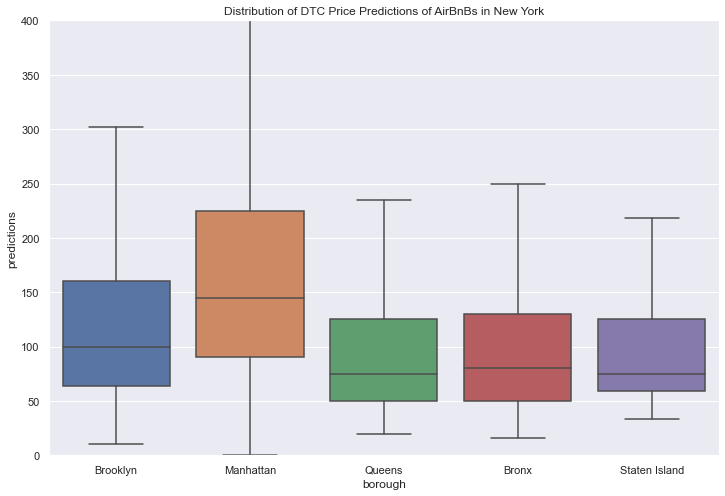

In [79]:
warnings. filterwarnings('ignore')

y_pred_DTC = dtc.predict(X_test_DTC)
X_test_DTC['predictions'] = y_pred_DTC

merged = pd.concat([y_test_DTC, X_test_DTC], axis = 1)

d= {1510:'Brooklyn', 
1780: 'Manhattan', 
1670:'Queens', 
1250:'Bronx', 
1320:'Staten Island'}

merged['borough'] = merged['median_rent_all_2020'].map(d)

sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'predictions', x = 'borough', showfliers = False).set(title = "Distribution of DTC Price Predictions of AirBnBs in New York"); 
plt.ylim(0,400);

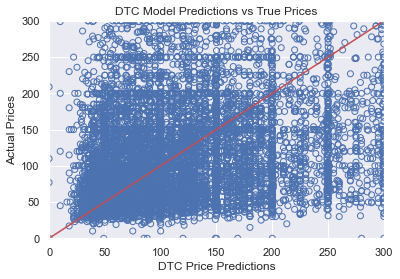

In [80]:
#plot predicted price vs actual price (x and y axis) with x = y line in middle

axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,300])

plot1 = plt.scatter(y_pred_DTC, y_test_DTC , facecolors='none', edgecolors = 'b')
plt.plot([0,300], [0,300], color = 'r')

plt.xlabel('DTC Price Predictions')
plt.ylabel('Actual Prices')
plt.title('DTC Model Predictions vs True Prices');

---

## Now, let's look at a Logistic Regression model with the same features.

In [81]:
features_logreg = ['housing_units','index_of_all_housing_type_price_appreciation','serious_crime_rate_per_1000_residents','median_rent_all_2020', 'public_housing_percentage_of_rental_units','latitude','longitude','availability_365']
X_train_logreg = listing_train[features_logreg]
X_test_logreg = listing_test[features_logreg]
y_train_logreg = listing_train['price']
y_test_logreg = listing_test['price']

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_logreg, y_train_logreg)

LogisticRegression(random_state=88)

In [83]:
y_prob = logreg.predict_proba(X_test_logreg)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index = y_test_logreg.index)
logreg_acc = accuracy_score(y_test_logreg, y_pred_logreg)
print ("\nAccuracy:", logreg_acc)


Accuracy: 0.0010833258102374288


### Our Logistic Regression model performs with < 1% accuracy! Yikes!

---

## Visualizations for LogReg Model

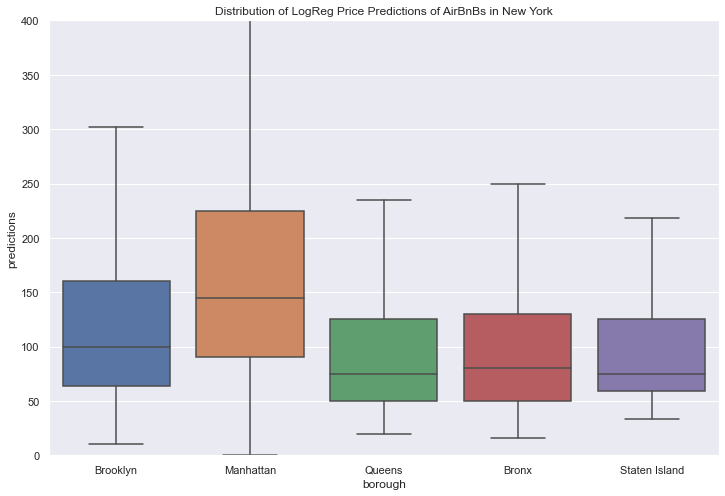

In [84]:
warnings. filterwarnings('ignore')

y_pred_logreg = dtc.predict(X_test_logreg)
X_test_logreg['predictions'] = y_pred_logreg

merged = pd.concat([y_test_logreg, X_test_logreg], axis = 1)

d= {1510:'Brooklyn', 
1780: 'Manhattan', 
1670:'Queens', 
1250:'Bronx', 
1320:'Staten Island'}

merged['borough'] = merged['median_rent_all_2020'].map(d)

sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'predictions', x = 'borough', showfliers = False).set(title = "Distribution of LogReg Price Predictions of AirBnBs in New York"); 
plt.ylim(0,400);

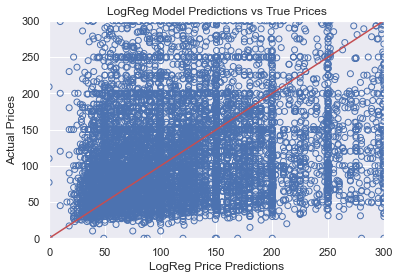

In [85]:
#plot predicted price vs actual price (x and y axis) with x = y line in middle

axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,300])

plot1 = plt.scatter(y_pred_logreg, y_test_logreg , facecolors='none', edgecolors = 'b')
plt.plot([0,300], [0,300], color = 'r')

plt.xlabel('LogReg Price Predictions')
plt.ylabel('Actual Prices')
plt.title('LogReg Model Predictions vs True Prices');

---

## Let's look at if we have better luck with a Random Forest Regressor

In [86]:
listing_data_rf = listing_data.drop(columns = ['id', 'neighbourhood', 'license', 'name', 'calculated_host_listings_count', 'host_name', 'host_id', 'last_review'])
listing_data_rf = listing_data_rf.fillna(listing_data.mean())
listing_data_rf['2020_population'] = listing_data_rf['2020_population'].astype('float')
listing_data_rf['housing_units'] = listing_data_rf['housing_units'].astype('float')
listing_data_rf['index_of_all_housing_type_price_appreciation'] = listing_data_rf['index_of_all_housing_type_price_appreciation'].astype('float')
listing_data_rf['serious_crime_rate_per_1000_residents'] = listing_data_rf['serious_crime_rate_per_1000_residents'].astype('float')
listing_data_rf['median_rent_all_2020'] = listing_data_rf['median_rent_all_2020'].astype('float')
listing_data_rf['public_housing_percentage_of_rental_units'] = listing_data_rf['public_housing_percentage_of_rental_units'].astype('float')

In [87]:
from sklearn.model_selection import train_test_split

y = listing_data_rf['price']
X = pd.get_dummies(listing_data_rf.drop(['price'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape


((25846, 22), (11077, 22))

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=22, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   46.1s finished


RandomForestRegressor(max_features=22, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=1)

In [89]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [90]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, X_test, y_test, y_train), 5))

OSR2: 0.15136


### Although we have a low OSR^2 value, let's look at feature importance.

In [91]:
feature_importance = pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)

In [92]:
feature_importance.sort_values(by='Importance score', ascending=False)

Feature  Importance score
0                                       latitude              31.6
1                                      longitude              25.3
5                               availability_365              13.2
2                                 minimum_nights               7.6
4                              reviews_per_month               6.5
3                              number_of_reviews               5.7
20                        room_type_Private room               3.7
18                     room_type_Entire home/apt               3.6
6                          number_of_reviews_ltm               1.4
21                         room_type_Shared room               0.3
8                           median_rent_all_2020               0.2
10  index_of_all_housing_type_price_appreciation               0.1
9                                  housing_units               0.1
12     public_housing_percentage_of_rental_units               0.1
14                              borough_Brooklyn               0.1
15                             borough_Manhattan               0.1
19                          room_type_Hotel room               0.1
7                                2020_population               0.1
11         serious_crime_rate_per_1000_residents               0.1
13                                 borough_Bronx               0.0
16                                borough_Queens               0.0
17                         borough_Staten Island               0.0

#### Strange! Latitude and longitude has the highest importance score, although it also had the highest VIF score in our final OLS model! 

### Random Forest Regressor with CV

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#Change max features later, it takes too long to run
grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=3,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   5.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   5.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.7s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.1s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   5.6s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   5.6s
[CV] END max_features=4, min_samples_leaf=5, n_es

GridSearchCV(cv=KFold(n_splits=3, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

#### Let's select the best hyperparameters below.

In [94]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

print(rf_cv.best_params_)

{'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [95]:
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.12112
OSR2: 0.16431


#### Great! Our OSR^2 increased by .01.

In [96]:
feature_importance_2 = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1).sort_values(by="Importance score", ascending=False)
feature_importance_2.head()


Feature  Importance score
0           latitude              24.3
1          longitude              23.0
5   availability_365              15.4
4  reviews_per_month               7.9
3  number_of_reviews               7.7

---

## Visualizations for Ramdom Forest Regressor Model

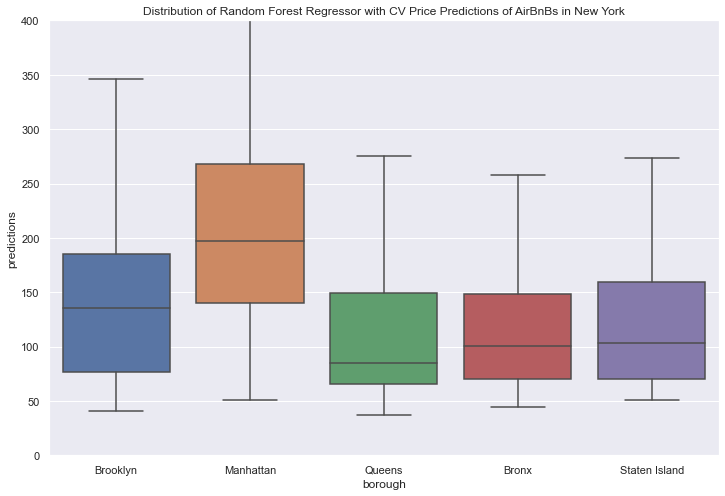

In [97]:
warnings. filterwarnings('ignore')

y_pred_rf_cv = rf_cv.predict(X_test)
X_test['predictions'] = y_pred_rf_cv

merged = pd.concat([y_test, X_test], axis = 1)

d= {1510:'Brooklyn', 
1780: 'Manhattan', 
1670:'Queens', 
1250:'Bronx', 
1320:'Staten Island'}

merged['borough'] = merged['median_rent_all_2020'].map(d)

sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'predictions', x = 'borough', showfliers = False).set(title = "Distribution of Random Forest Regressor with CV Price Predictions of AirBnBs in New York"); 
plt.ylim(0,400);

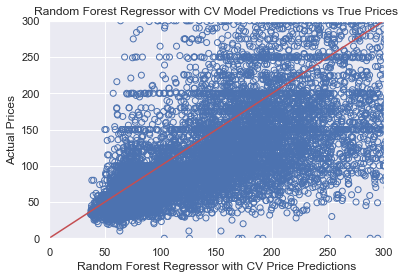

In [98]:
#plot predicted price vs actual price (x and y axis) with x = y line in middle

axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,300])

plot1 = plt.scatter(y_pred_rf_cv, y_test , facecolors='none', edgecolors = 'b')
plt.plot([0,300], [0,300], color = 'r')

plt.xlabel('Random Forest Regressor with CV Price Predictions')
plt.ylabel('Actual Prices')
plt.title('Random Forest Regressor with CV Model Predictions vs True Prices');

---

### Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y = listing_data_rf['price']
X = pd.get_dummies(listing_data_rf.drop(['price'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_pred_test = forest.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred_test)

0.06211067978694593

### Wow! We have reached an accuracy of approximately 6.08% with the Random Forest Classifier model.

---

## Visualizations for Random Forest Classifier Model

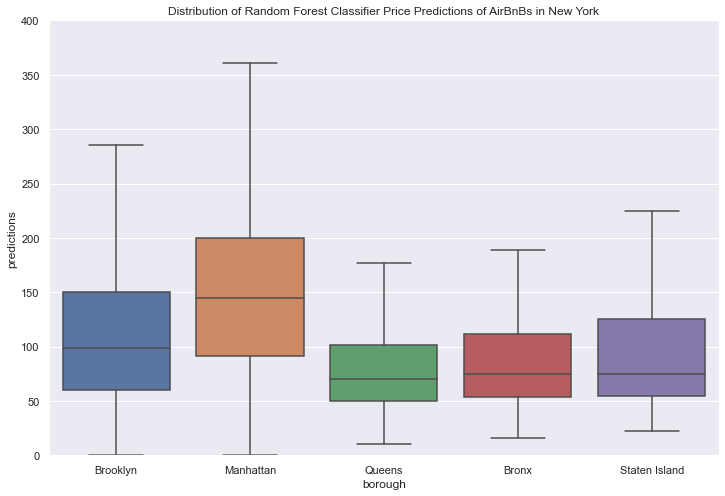

In [102]:
warnings. filterwarnings('ignore')

X_test['predictions'] = y_pred_test

merged = pd.concat([y_test, X_test], axis = 1)

d= {1510:'Brooklyn', 
1780: 'Manhattan', 
1670:'Queens', 
1250:'Bronx', 
1320:'Staten Island'}

merged['borough'] = merged['median_rent_all_2020'].map(d)

sns.set()
plt.figure(figsize = (12, 8))
sns.boxplot(data = merged, y = 'predictions', x = 'borough', showfliers = False).set(title = "Distribution of Random Forest Classifier Price Predictions of AirBnBs in New York"); 
plt.ylim(0,400);

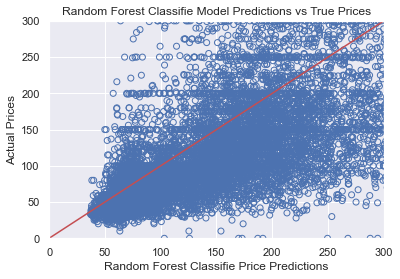

In [103]:
#plot predicted price vs actual price (x and y axis) with x = y line in middle

axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,300])

plot1 = plt.scatter(y_pred_rf_cv, y_test , facecolors='none', edgecolors = 'b')
plt.plot([0,300], [0,300], color = 'r')

plt.xlabel('Random Forest Classifie Price Predictions')
plt.ylabel('Actual Prices')
plt.title('Random Forest Classifie Model Predictions vs True Prices');